# Mexico COVID-19 Model Prototype

### Date obtained from Kaggle (https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset)

In [24]:
import pandas as pd #Data cleaning
import os
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization
import numpy as np #data cleaning
import warnings #Remove warnings

#Sklearn modules
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression #model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier #moodel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier #Model

#Other
warnings.filterwarnings('ignore')

# Data Import and Exploration

In [25]:
# Find current path
df = pd.read_csv("D:\\SHU\\Data science project\\COVID-19-Data-Science-Project-SHU\\covid.csv")
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [26]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


# Feature Engineering 

In [27]:
#Look at column data types
df.dtypes

id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

In [28]:
df.date_died = df['date_died'].astype(str)
df.dtypes

id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

In [29]:
#Change variable assignment 
df_covid_pos = df

#Discretize date died to patient died
df_covid_pos['died'] = df_covid_pos['date_died'].apply(lambda x: int(0) if x == '9999-99-99' else int(1))

# Data Visualization

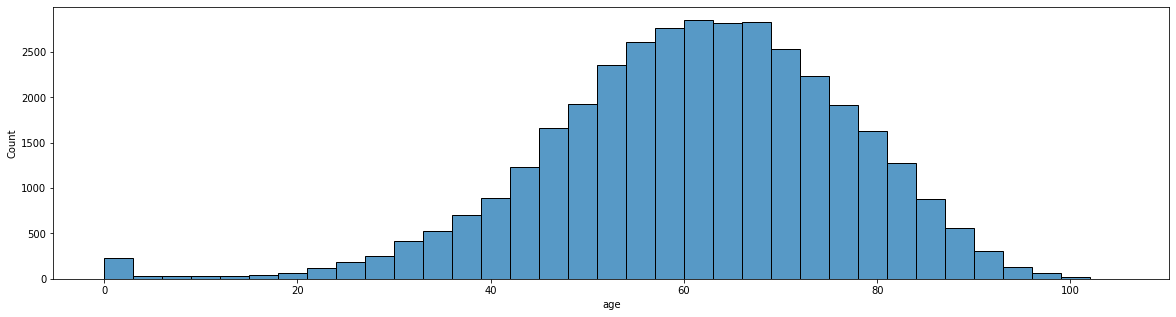

In [30]:
# Visualize age distribution for the cases of death
df_dead = df_covid_pos[df_covid_pos.died == 1]
plt.figure(figsize=(20,5))
sns.histplot(df_dead, x = 'age',binwidth=3)

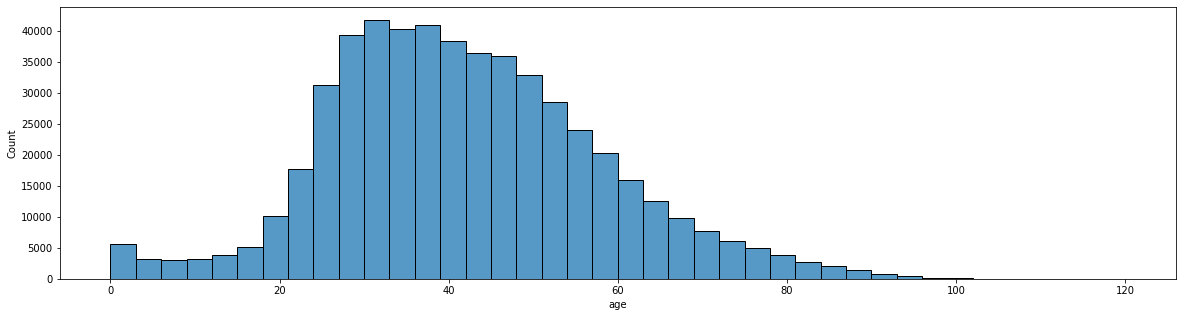

In [31]:
# Visualize age distribution for the cases of survived, shift to the left compare the above histgram
df_undead = df_covid_pos[df_covid_pos.died == 0]
plt.figure(figsize=(20,5))
sns.histplot(df_undead, x = 'age', binwidth=3)

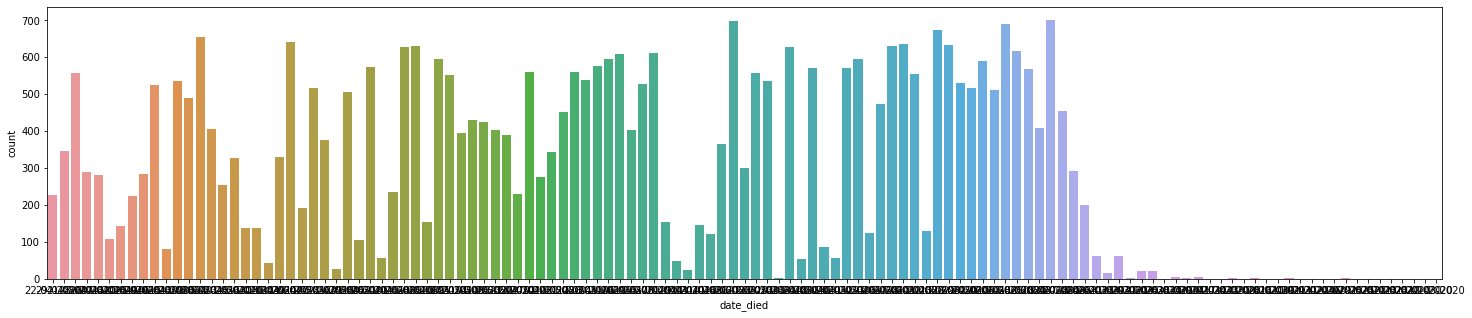

In [32]:
# Show time series of cases of Death
plt.figure(figsize=(25,5))
sns.countplot(x = 'date_died',data = df_dead)

# Data Cleaning

In [33]:
#### Convert numbers values that indicate incomplete data into NaN ####
features = list(df_covid_pos.columns) #Create list of column names

#Loop through and check for values that should be replaced with NaN
print("Starting NaN Input...")
for curr_feature in features:
    print("{} start".format(curr_feature)) #Current feature in loop
    df_covid_pos[curr_feature] =    df_covid_pos[curr_feature].apply(lambda x: np.nan if (x == 97) or (x == 98) or (x == 99) else x)
    print("{} end".format(curr_feature)) #Current feature in loop
print("NaN Input Finished")

Starting NaN Input...
id start
id end
sex start
sex end
patient_type start
patient_type end
entry_date start
entry_date end
date_symptoms start
date_symptoms end
date_died start
date_died end
intubed start
intubed end
pneumonia start
pneumonia end
age start
age end
pregnancy start
pregnancy end
diabetes start
diabetes end
copd start
copd end
asthma start
asthma end
inmsupr start
inmsupr end
hypertension start
hypertension end
other_disease start
other_disease end
cardiovascular start
cardiovascular end
obesity start
obesity end
renal_chronic start
renal_chronic end
tobacco start
tobacco end
contact_other_covid start
contact_other_covid end
covid_res start
covid_res end
icu start
icu end
died start
died end
NaN Input Finished


In [34]:
df_covid_pos.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,NaN,2.0,27.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN,0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,NaN,2.0,24.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN,0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,54.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1,2.0,0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,30.0,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,2.0,0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60.0,2.0,...,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1,2.0,1


## Drop uneeded columns before remove NaN rows

### Graph Percentage of NaNs per Feature

Text(0, 0.5, 'Percentage of Values that are nan')

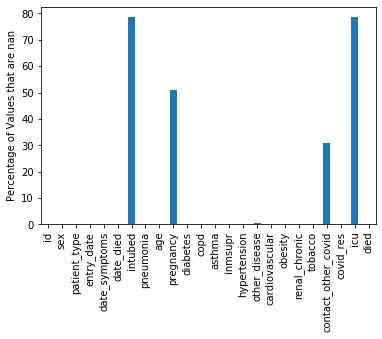

In [35]:
missing_data = df_covid_pos.isnull().sum() * 100 / len(df)
missing_data.plot.bar()
plt.ylabel("Percentage of Values that are nan")

# Data Prep for predicting probability of death

In [36]:
# Remove certain features (non-dv candidates)
df_covid_pos_columns_removed = df_covid_pos.drop(['id', 'patient_type', 'date_symptoms','entry_date', 'date_died', 'intubed', 'icu'], axis=1)
print("Observations before na removal = {}".format(df_covid_pos_columns_removed.shape[0]))

#Remove rows with NaN
df_covid_pos_columns_removed = df_covid_pos_columns_removed.dropna()
print("Observations after na removal = {}".format(df_covid_pos_columns_removed.shape[0]))

#Remove dv and assign dv
y = df_covid_pos_columns_removed.died.tolist()
df_covid_pos_columns_removed = df_covid_pos_columns_removed.drop(['died'], axis = 1)

#Create design matrix
print("Model Predictors = {}".format(df_covid_pos_columns_removed.columns))
X = df_covid_pos_columns_removed.to_numpy()

Observations before na removal = 566602
Observations after na removal = 190430
Model Predictors = Index(['sex', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res'],
      dtype='object')


# Split data into train test split

In [37]:
#Check and make sure the number of rows in X match that in y
print("nrow X = {}".format(X.shape[0]))
print("nrow y = {}".format(len(y)))

nrow X = 190430
nrow y = 190430


In [38]:
seed = 7  #set random seed
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, #test_size (refer to the instructions for the assignment)
                                                    random_state = seed, #seed the random generator for reproducibilty
                                                    stratify = y)

# Model Training and Evaluation 

## Logistic regression (Unbalanced Labels)

Logistic Accuracy = 0.9761942271000718


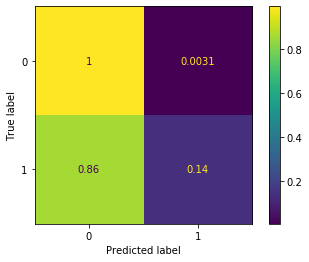

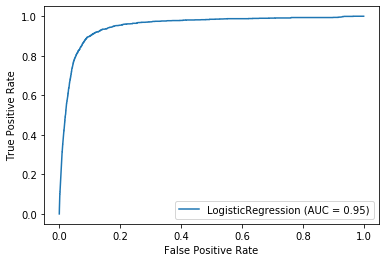

In [39]:
#Fit/train model
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

#Test model
y_pred = logisticRegr.predict(X_test)
logisticRegr_accuracy = accuracy_score(y_test, y_pred)

#Evaluate model
print('Logistic Accuracy = {}'.format(logisticRegr_accuracy))
plot_confusion_matrix(logisticRegr, X_test, y_test, normalize='true')
plot_roc_curve(logisticRegr, X_test, y_test)

### The above confusion matrix shows that the model biased toward predicting that a patient is alive as opposed to being dead. This is likly due to the large difference between the number of class labels

# Simulating more dead training instances

### Create function that simulates more instances of dead label

In [40]:
#Create a function that randomly samples from each attribute (Based on distribution of those who died)
def random_label_generation(y_train, X_train, feature_names):
    new_training_instances = dict() #Initialize dictionary object
    output_train_array = np.array(y_train) #convert y_train to numpy array (Will allow for indexing )
    unique, unique_counts = np.unique(output_train_array, return_counts = True) #count number of labels
    min_label = unique[unique_counts == np.min(unique_counts)] #Finds the label with the smallest number of instances
    input_train_matrix = X_train[output_train_array == min_label ,:] #Take only the rows that belong to the smallest label
    number_instances_to_sample = np.max(unique_counts) - np.min(unique_counts) #Calculate the difference that needs to be accounted for
    #Loop through and sample from each feature number_instances_to_sample times
    for feature in range(len(feature_names)):
        new_training_instances[feature_names[feature]] = np.random.choice(input_train_matrix[:, feature], number_instances_to_sample, replace = True)
    return(new_training_instances)

### Check that the number of dead instances match that of the number of alive instances

In [41]:
new_traning_instances = random_label_generation(y_train, X_train, df_covid_pos_columns_removed.columns)
new_traning_instances = pd.DataFrame(new_traning_instances).to_numpy()

#Check and make sure the number of death training instances match the number of alive training instances
diff_in_instances = (X_train[np.array(y_train) == 1 ,:].shape[0] +  new_traning_instances.shape[0]) - X_train[np.array(y_train) == 0 ,:].shape[0]#Take only the rows that belong to the smallest label
print("Number of instances for those who died - Number of instances for those who survived = {}".format(diff_in_instances))

Number of instances for those who died - Number of instances for those who survived = 0


In [42]:
# Add new training instances and labels to X_trian and y_train
X_train_new = np.vstack((X_train, new_traning_instances)) #Combine old predictor instances with new
y_train_new = list(y_train) + list(np.ones(new_traning_instances.shape[0]).astype(int)) #Combine new labels

# Logistic Regression with newly simulated instances

Logistic Accuracy = 0.9078051427471162


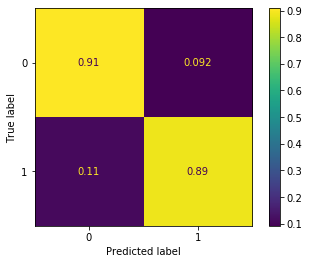

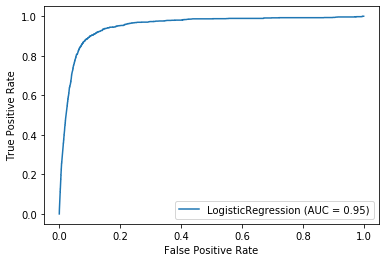

In [43]:
#Fit/train model
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_new, y_train_new)

#Test model
y_pred = logisticRegr.predict(X_test)
logisticRegr_accuracy = accuracy_score(y_test, y_pred)

#Evaluate model
print('Logistic Accuracy = {}'.format(logisticRegr_accuracy))
plot_confusion_matrix(logisticRegr, X_test, y_test, normalize='true')
plot_roc_curve(logisticRegr, X_test, y_test)

# K-NN Classifier (Hyperparameter tuning)

In [25]:
k_list = [] #Store different values of k
knn_accuracy = [] #Store accuracy
k = 1
while k < 30:
    knn = KNeighborsClassifier(n_neighbors = k) #Initialize model
    knn.fit(X_train_new, y_train_new) #Fit model

    predictions = knn.predict(X_test) #Predict test set
    knn_accuracy_result = round(accuracy_score(y_test, predictions), 3) * 100
    knn_accuracy.append(knn_accuracy_result)
    k_list.append(k)

    k += 1 #Incriment k by 1

### Result

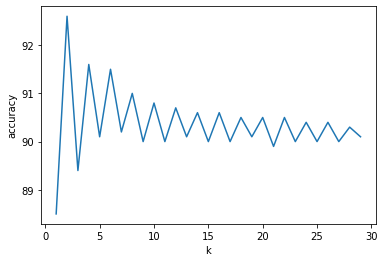

In [26]:
plt.plot(k_list, knn_accuracy)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

### Choose best model

knn_accuracy = 91.5


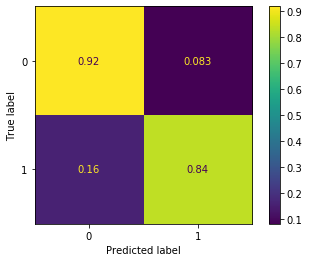

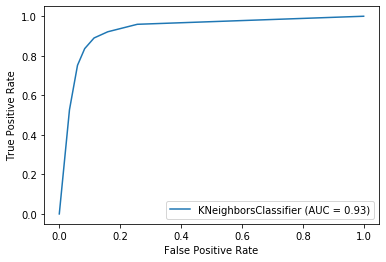

In [44]:
knn = KNeighborsClassifier(n_neighbors = 6) #Initialize model
knn.fit(X_train_new, y_train_new) #Fit model

predictions = knn.predict(X_test) #Predict test set

#Plot results
plot_confusion_matrix(knn, X_test, y_test, normalize='true')
plot_roc_curve(knn, X_test, y_test)
print("knn_accuracy = {}".format(round(accuracy_score(y_test, predictions), 3) * 100))

# Linear Support Vector machine

In [45]:
########## With hyperparameter tuning ##########

param_grid = {'penalty': ['l1', 'l2'],
              'loss': ['hinge', 'squared_hinge'],
              'max_iter': [1000, 1050, 2000],
              'tol': [0.0004, 0.0005, 0.0003, 0.0006]}

#Start Random search
SV = LinearSVC()
random_grid_search = RandomizedSearchCV(estimator = SV,
                                        param_distributions = param_grid,
                                        n_iter = 60,
                                        scoring = 'accuracy',
                                        return_train_score = True,
                                        cv = 10,
                                        n_jobs = 6,
                                        verbose = 3)

estimator = random_grid_search.fit(X_train_new, y_train_new)
print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_)

#Save best nb estimator
sv_best = estimator.best_estimator_

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters: {'tol': 0.0006, 'penalty': 'l2', 'max_iter': 1000, 'loss': 'squared_hinge'}
Best score: 0.9000645948781594


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   47.0s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 12.8min
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed: 44.1min
[Parallel(n_jobs=6)]: Done 480 out of 480 | elapsed: 89.1min finished


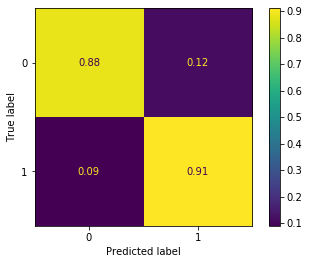

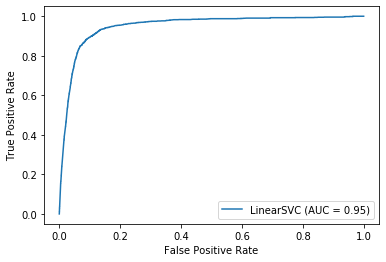

In [47]:
#Model evaluation
plot_confusion_matrix(sv_best, X_test, y_test, normalize='true')
plot_roc_curve(sv_best, X_test, y_test)

# Voting Classifier

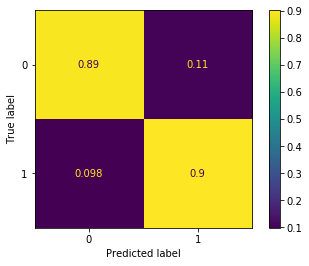

In [49]:
#create a dictionary of our models
estimators=[('sv', sv_best), ('knn', knn), ('lr', logisticRegr)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model
ensemble.fit(X_train_new, y_train_new)

#Score model and evaluation
ensemble.score(X_test, y_test)
plot_confusion_matrix(ensemble, X_test, y_test, normalize='true')
plot_roc_curve(ensemble, X_test, y_test)


